## Problem Statement

Build a Machine Learning Model that classifies customers into high revenue and low revenue

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle ## helps storing data in pickle files
%matplotlib inline

## Setting Display options 

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Warning Suppression 

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Import Data for ML Project

In [4]:
# Reading the data
data = pd.read_csv('/Users/priyankac/Downloads/Projects/Existing_Base.csv')

In [5]:
# Check the first few records
data.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Revenue Grid,gender,region,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,1972,HTV,NP4 9HS,NP4,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,1,Female,Wales,74.67,18.66,32.32,89.43
1,2,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,1998,Granada,M41 0QH,M41,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2,Female,North West,20.19,0.00,4.33,22.78
2,3,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,1996,Tyne Tees,NE30 1JZ,NE30,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,2,Male,North,98.06,31.07,80.96,171.78
3,5,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,1997,Central,HR9 7RJ,HR9,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,2,Female,West Midlands,4.10,14.15,17.57,-41.70
4,6,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,1995,Scottish TV,KA10 7LS,KA10,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,2,Female,Scotland,70.16,55.86,80.44,235.02


In [6]:
# Check the number of rows and columns
data.shape

(10155, 32)

In [7]:
# Check information about the data
data.info()

## Insight##
# Out of 32 columns, we have around 18 columns of numeric type, 14 columns of string type
# There doesn't seem to have missing values in the columns, however we would investigate this once again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10155 entries, 0 to 10154
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           10155 non-null  int64  
 1   children                         10155 non-null  object 
 2   age_band                         10155 non-null  object 
 3   status                           10155 non-null  object 
 4   occupation                       10155 non-null  object 
 5   occupation_partner               10155 non-null  object 
 6   home_status                      10155 non-null  object 
 7   family_income                    10155 non-null  object 
 8   self_employed                    10155 non-null  object 
 9   self_employed_partner            10155 non-null  object 
 10  year_last_moved                  10155 non-null  int64  
 11  TVarea                           10155 non-null  object 
 12  post_code         

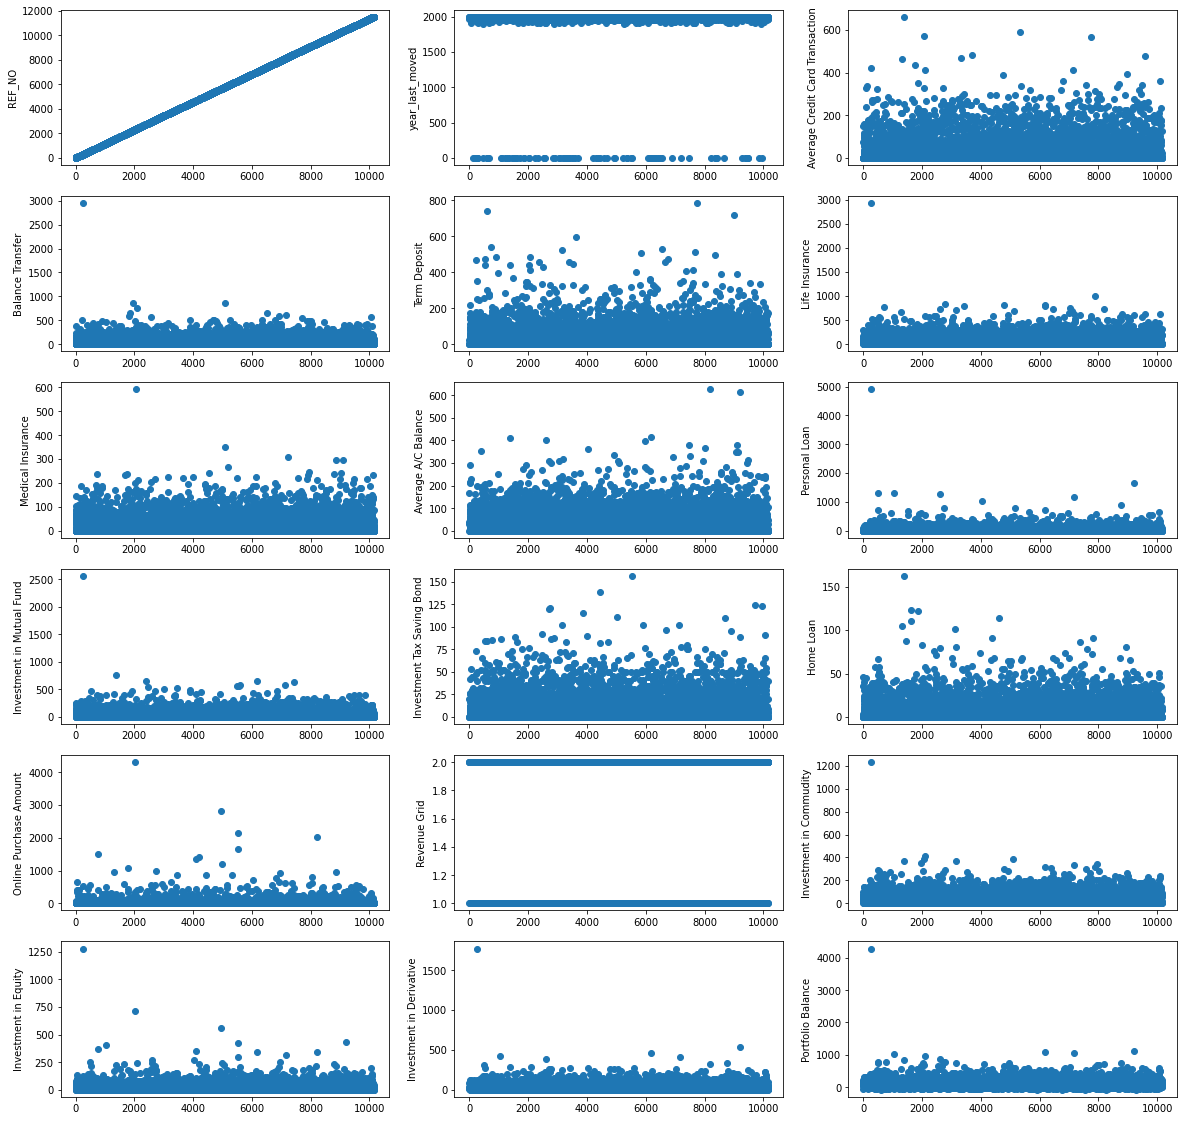

In [8]:
#### Visualizing numeric columns ######

numeric_cols = data.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 6
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1
        
###### Insights #####
#####################

## Ref Number column just contains the index so can be removed.
## year_last_moved column seem to have many values close to 0 or 0, these seem to be missing values, investigate them.
## Average_credit_card_transaction,Balance Transfer seems to be highly right skewed, check if the skewness could be reduced.
## A single customer with very high value of balance transfer/life insurance etc stands out, this row could be considered outlier and be removed,
## Capping could be done to limit the impact of outliers.
## Scaling could be done since the scale is different for most of the variables.

## Drop ID type of feature('REF_NO')

In [9]:
data = data.drop(['REF_NO'], axis = 1)

In [10]:
data.dtypes

children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purc

## Label the Target Feature to 0/1

In [11]:
# Distribution of the Target Feature
data['Revenue Grid'].value_counts()

# There is class imbalance in my dataset(9069 customers are low revenue as compared to 1086 high revenue customers)
# The distribution is between 80%-20% and 95%-5% -  area of slight concern..


2    9069
1    1086
Name: Revenue Grid, dtype: int64

In [12]:
data['target'] = np.where(data['Revenue Grid'] == 2, 0,1)

## Drop the 'Revenue Grid' Feature to retain 'Target' Feature

In [13]:
data = data.drop(['Revenue Grid'], axis = 1)

In [14]:
data['target'].value_counts()


0    9069
1    1086
Name: target, dtype: int64

In [15]:
data.dtypes

children                            object
age_band                            object
status                              object
occupation                          object
occupation_partner                  object
home_status                         object
family_income                       object
self_employed                       object
self_employed_partner               object
year_last_moved                      int64
TVarea                              object
post_code                           object
post_area                           object
Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purc

## Defining the Target and Independent Features

In [16]:
Y = data[['target']]
X = data.drop(['target'], axis = 1)

In [17]:
X.shape

(10155, 30)

In [18]:
Y.shape

(10155, 1)

In [19]:
Y.mean()

target    0.106942
dtype: float64

## Split the features into Numerical and Categorical

In [20]:
num = X.select_dtypes(include = 'number')
char = X.select_dtypes(include = 'object')

In [21]:
num.shape


(10155, 16)

In [22]:
char.shape

(10155, 14)

In [23]:
num.head()

,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
0,1972,148.44,142.95,0.00,81.96,0.00,29.99,0.00,61.95,19.99,0.00,0.00,74.67,18.66,32.32,89.43
1,1998,0.00,74.98,0.00,25.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.19,0.00,4.33,22.78
2,1996,0.00,166.44,20.99,291.37,11.48,166.94,0.00,15.99,0.00,3.49,0.00,98.06,31.07,80.96,171.78
3,1997,0.00,0.00,0.00,20.49,0.00,39.46,0.00,45.44,0.00,0.00,0.00,4.10,14.15,17.57,-41.70
4,1995,73.45,57.96,0.00,177.42,41.95,39.47,10.97,212.84,0.00,45.91,25.98,70.16,55.86,80.44,235.02


In [24]:
char.head()

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
0,Zero,51-55,Partner,Manual Worker,Secretarial/Admin,Own Home,"<17,500, >=15,000",No,No,HTV,NP4 9HS,NP4,Female,Wales
1,Zero,55-60,Single/Never Married,Retired,Retired,Own Home,"<27,500, >=25,000",No,No,Granada,M41 0QH,M41,Female,North West
2,Zero,26-30,Single/Never Married,Professional,Other,Own Home,"<30,000, >=27,500",Yes,No,Tyne Tees,NE30 1JZ,NE30,Male,North
3,Zero,18-21,Single/Never Married,Professional,Manual Worker,Own Home,"<15,000, >=12,500",No,No,Central,HR9 7RJ,HR9,Female,West Midlands
4,Zero,45-50,Partner,Business Manager,Unknown,Own Home,"<30,000, >=27,500",No,No,Scottish TV,KA10 7LS,KA10,Female,Scotland


## Check Distribution of Numeric Features

<AxesSubplot:xlabel='Average Credit Card Transaction', ylabel='Density'>

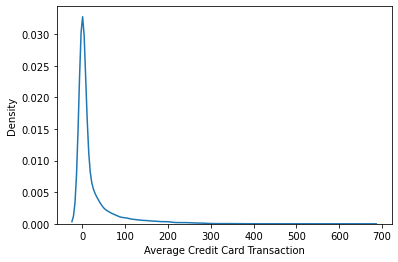

In [25]:
sns.distplot(data['Average Credit Card Transaction'],hist = False)

<AxesSubplot:xlabel='Balance Transfer', ylabel='Density'>

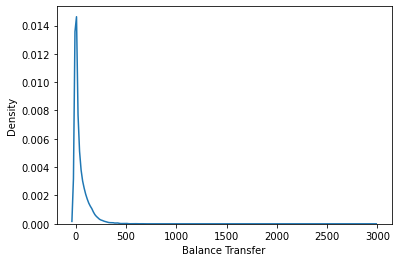

In [26]:
sns.distplot(data['Balance Transfer'],hist = False)

<AxesSubplot:xlabel='Term Deposit', ylabel='Density'>

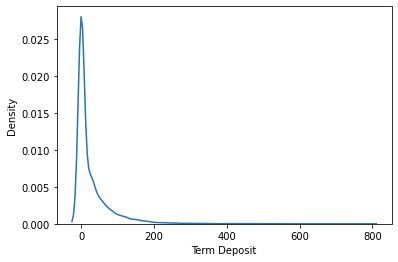

In [27]:
sns.distplot(data['Term Deposit'],hist = False)

<AxesSubplot:xlabel='Life Insurance', ylabel='Density'>

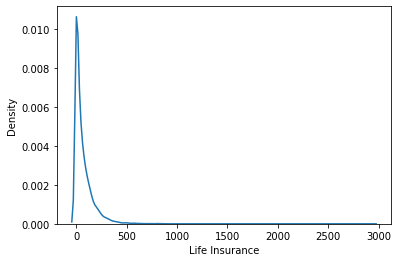

In [28]:
sns.distplot(data['Life Insurance'],hist = False)

<AxesSubplot:xlabel='Medical Insurance', ylabel='Density'>

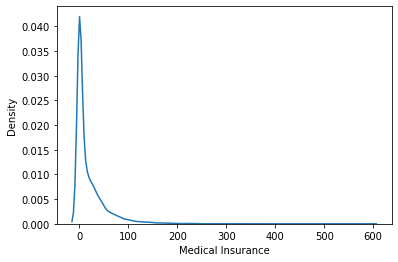

In [29]:
sns.distplot(data['Medical Insurance'],hist = False)

<AxesSubplot:xlabel='Average A/C Balance', ylabel='Density'>

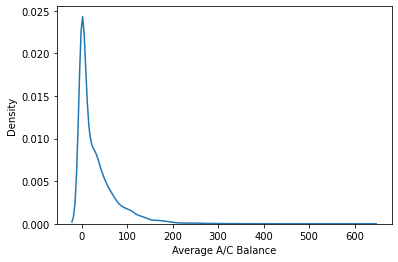

In [30]:
sns.distplot(data['Average A/C Balance'],hist = False)

<AxesSubplot:xlabel='Personal Loan', ylabel='Density'>

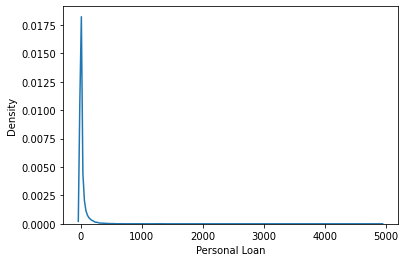

In [31]:
sns.distplot(data['Personal Loan'],hist = False)

<AxesSubplot:xlabel='Investment in Mutual Fund', ylabel='Density'>

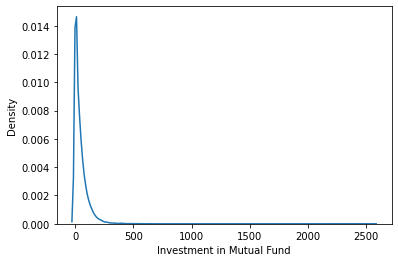

In [32]:
sns.distplot(data['Investment in Mutual Fund'],hist = False)

<AxesSubplot:xlabel='Investment Tax Saving Bond', ylabel='Density'>

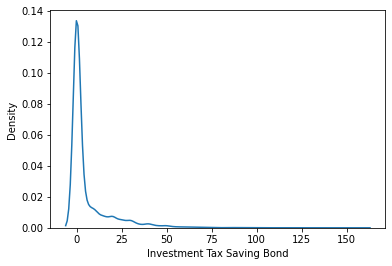

In [33]:
sns.distplot(data['Investment Tax Saving Bond'],hist = False)

<AxesSubplot:xlabel='Home Loan', ylabel='Density'>

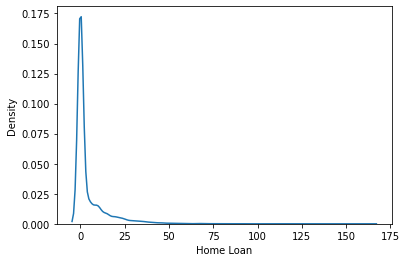

In [34]:
sns.distplot(data['Home Loan'],hist = False)

<AxesSubplot:xlabel='Online Purchase Amount', ylabel='Density'>

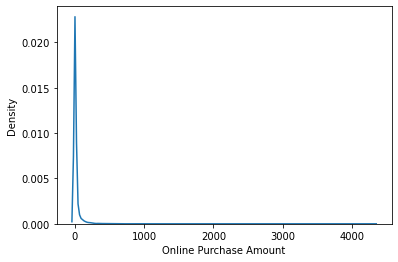

In [35]:
sns.distplot(data['Online Purchase Amount'],hist = False)

<AxesSubplot:xlabel='Portfolio Balance', ylabel='Density'>

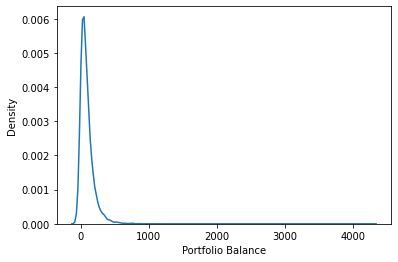

In [36]:
sns.distplot(data['Portfolio Balance'],hist = False)

<AxesSubplot:xlabel='Investment in Commudity', ylabel='Density'>

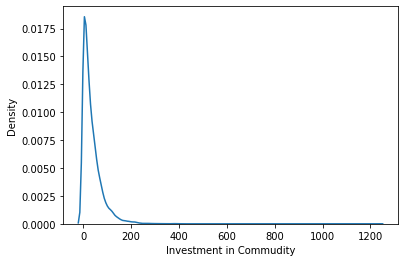

In [37]:
sns.distplot(data['Investment in Commudity'],hist = False)

<AxesSubplot:xlabel='Investment in Equity', ylabel='Density'>

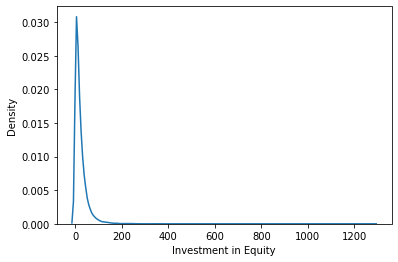

In [38]:
sns.distplot(data['Investment in Equity'],hist = False)

<AxesSubplot:xlabel='Investment in Derivative', ylabel='Density'>

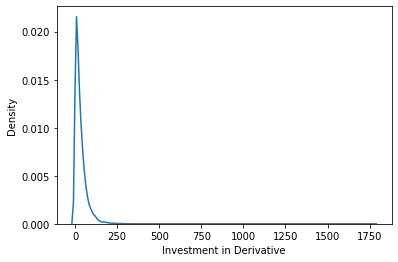

In [39]:
sns.distplot(data['Investment in Derivative'],hist = False)

In [40]:
# All the numeric columns show skewness

In [41]:
# Check the number of unique feature levels in numeric columns
def unique_levels(x):
    x = x.value_counts().count()
    return(x)

df_value_counts = pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts

,0
year_last_moved,95
Average Credit Card Transaction,1411
Balance Transfer,2183
Term Deposit,1419
Life Insurance,3111
Medical Insurance,1589
Average A/C Balance,2223
Personal Loan,1760
Investment in Mutual Fund,2470
Investment Tax Saving Bond,832


In [42]:
df_value_counts.columns = ['feature_levels']
df_value_counts

# it is observed that faeture level in each feature is more that 25, hence no action to be taken

,feature_levels
year_last_moved,95
Average Credit Card Transaction,1411
Balance Transfer,2183
Term Deposit,1419
Life Insurance,3111
Medical Insurance,1589
Average A/C Balance,2223
Personal Loan,1760
Investment in Mutual Fund,2470
Investment Tax Saving Bond,832


## Outlier Analysis

In [43]:
num.describe(percentiles = [0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

# There seems to be huge difference between the 99th percentile and maximum value in most of the features
# showing presence of outliers, Capping could be done to limit the impact of outliers.

,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000
mean,1968.376366,23.441757,46.417760,27.579851,66.242131,19.142050,32.084965,26.006003,42.339698,6.112071,4.482002,19.162772,36.564886,21.698694,31.988647,90.460237
std,180.202242,50.872127,78.477609,53.952550,95.545316,32.451856,45.486614,84.275743,63.898899,12.833675,9.982641,89.666263,42.270530,31.893841,39.106347,107.265475
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000
1%,1907.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.873800
5%,1961.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.474000
10%,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.830000,-0.626000
25%,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.230000,4.670000,8.740000,26.605000
50%,1988.000000,0.000000,17.960000,0.000000,31.980000,0.510000,14.990000,0.000000,23.480000,0.000000,0.000000,0.000000,23.980000,12.980000,21.340000,66.200000
75%,1994.000000,23.980000,65.385000,34.990000,94.390000,27.470000,46.480000,21.480000,59.555000,5.975000,4.490000,7.980000,50.790000,28.300000,42.980000,125.935000


## Flooring and Capping of Outliers

In [44]:
def outlier_cap(x):
    x = x.clip(lower = x.quantile(0.01))
    x = x.clip(upper = x.quantile(0.99))
    return(x)

In [45]:
num = num.apply(lambda x : outlier_cap(x))

In [46]:
num.describe(percentiles = [0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])


,year_last_moved,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
count,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000,10155.000000
mean,1984.154316,22.781406,45.204479,26.537287,64.764332,18.694723,31.375817,23.754653,41.114853,5.928491,4.313395,15.898412,35.991296,20.950683,31.308643,88.785959
std,14.183307,46.791178,67.780219,47.147148,84.759513,29.790694,41.596444,53.425190,53.035966,11.780529,8.896872,45.787748,38.152670,24.417625,31.995266,91.277879
min,1907.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.873800
1%,1907.788400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-40.866348
5%,1961.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.474000
10%,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.830000,-0.626000
25%,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.230000,4.670000,8.740000,26.605000
50%,1988.000000,0.000000,17.960000,0.000000,31.980000,0.510000,14.990000,0.000000,23.480000,0.000000,0.000000,0.000000,23.980000,12.980000,21.340000,66.200000
75%,1994.000000,23.980000,65.385000,34.990000,94.390000,27.470000,46.480000,21.480000,59.555000,5.975000,4.490000,7.980000,50.790000,28.300000,42.980000,125.935000


## Missing Values Analysis

In [47]:
num.isnull().sum()

year_last_moved                    0
Average Credit Card Transaction    0
Balance Transfer                   0
Term Deposit                       0
Life Insurance                     0
Medical Insurance                  0
Average A/C Balance                0
Personal Loan                      0
Investment in Mutual Fund          0
Investment Tax Saving Bond         0
Home Loan                          0
Online Purchase Amount             0
Investment in Commudity            0
Investment in Equity               0
Investment in Derivative           0
Portfolio Balance                  0
dtype: int64

In [48]:
char.isnull().sum()

children                 0
age_band                 0
status                   0
occupation               0
occupation_partner       0
home_status              0
family_income            0
self_employed            0
self_employed_partner    0
TVarea                   0
post_code                0
post_area                0
gender                   0
region                   0
dtype: int64

In [49]:
# There is no missing values in this dataset

## Feature Selection - Numerical Features

### Part 1 : Remove Features with 0 Variance

In [50]:
from sklearn.feature_selection import VarianceThreshold
varselector = VarianceThreshold(threshold = 0)
varselector.fit_transform(num)

# Get columns to keep and create new dataframe with those only
cols = varselector.get_support(indices = True)
num_1 = num.iloc[:, cols]

In [51]:
num_1.iloc[0]

year_last_moved                    1972.00
Average Credit Card Transaction     148.44
Balance Transfer                    142.95
Term Deposit                          0.00
Life Insurance                       81.96
Medical Insurance                     0.00
Average A/C Balance                  29.99
Personal Loan                         0.00
Investment in Mutual Fund            61.95
Investment Tax Saving Bond           19.99
Home Loan                             0.00
Online Purchase Amount                0.00
Investment in Commudity              74.67
Investment in Equity                 18.66
Investment in Derivative             32.32
Portfolio Balance                    89.43
Name: 0, dtype: float64

### Part 2 : Bi Variate Analysis(KBinsDiscretizer)

In [52]:
from sklearn.preprocessing import KBinsDiscretizer

discrete = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
num_binned = pd.DataFrame(discrete.fit_transform(num_1), index = num_1.index, 
                          columns = num_1.columns).add_suffix('_Rank')
num_binned.head()

,year_last_moved_Rank,Average Credit Card Transaction_Rank,Balance Transfer_Rank,Term Deposit_Rank,Life Insurance_Rank,Medical Insurance_Rank,Average A/C Balance_Rank,Personal Loan_Rank,Investment in Mutual Fund_Rank,Investment Tax Saving Bond_Rank,Home Loan_Rank,Online Purchase Amount_Rank,Investment in Commudity_Rank,Investment in Equity_Rank,Investment in Derivative_Rank,Portfolio Balance_Rank
0,1.0,3.0,5.0,0.0,4.0,0.0,3.0,0.0,4.0,2.0,0.0,0.0,7.0,5.0,6.0,6.0
1,9.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,2.0
2,8.0,0.0,5.0,1.0,6.0,2.0,6.0,0.0,1.0,0.0,1.0,0.0,8.0,6.0,9.0,8.0
3,9.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
4,8.0,2.0,3.0,0.0,5.0,4.0,4.0,0.0,6.0,0.0,3.0,2.0,7.0,8.0,9.0,9.0


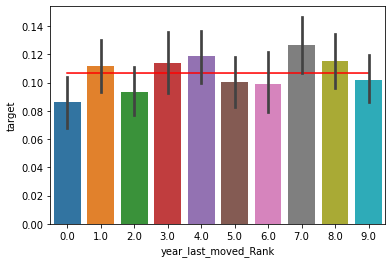

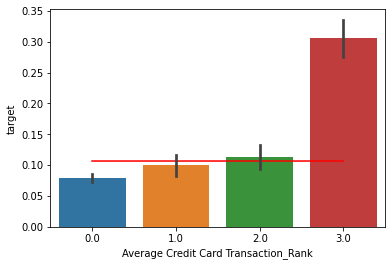

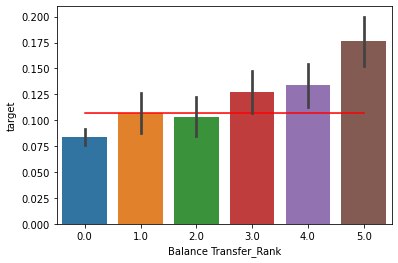

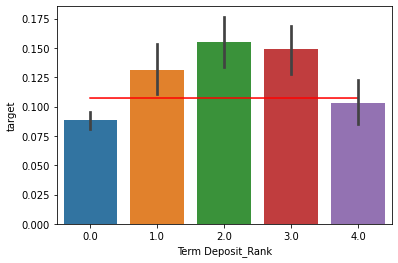

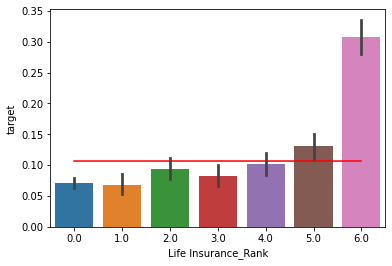

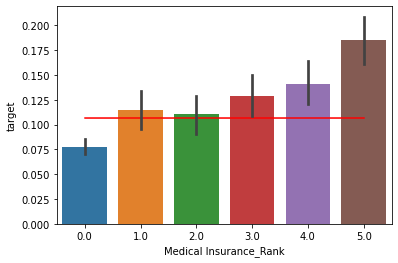

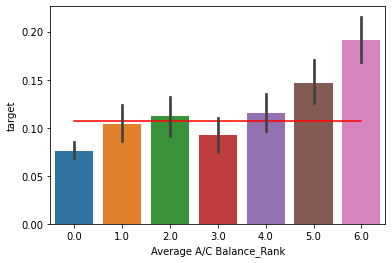

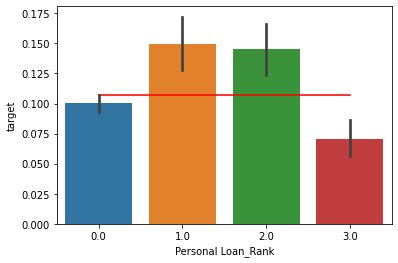

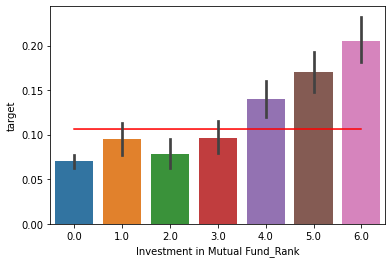

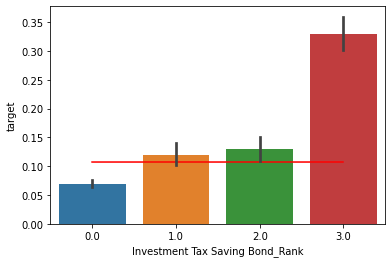

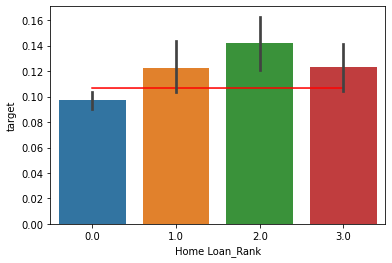

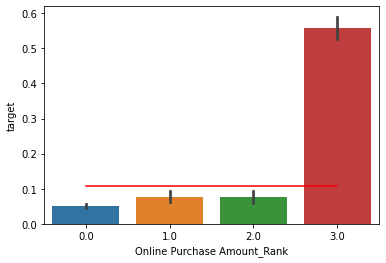

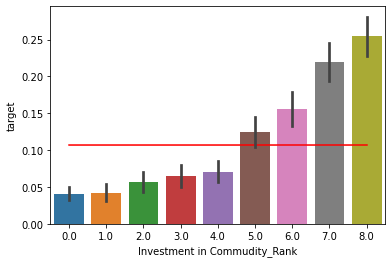

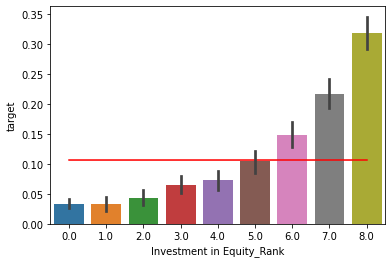

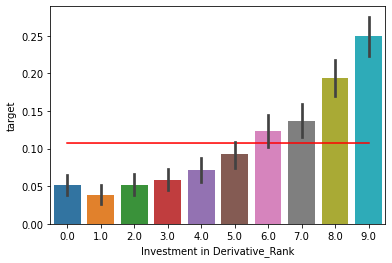

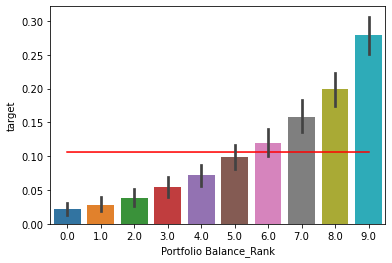

In [53]:
# Check if the features show a slope at all
# If they do, then do you see some deciles below the population average and some higher than the population average?
# If that is the case then the slope will be strong

# Conclusion: A strong slope is indicator of the features' ability to discriminate the event from non event
#             making it a good predictor

X_bin_combined = pd.concat([Y, num_binned], axis = 1, join = 'inner')

from numpy import mean
for cols in (num_binned.columns):
    plt.figure()
    sns.lineplot(x = cols, y = X_bin_combined['target'].mean(), data = X_bin_combined, color = 'red')
    sns.barplot(x = cols, y = 'target', data = X_bin_combined, estimator = mean)
plt.show()    

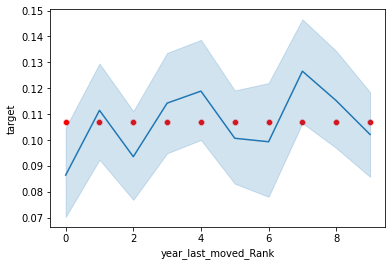

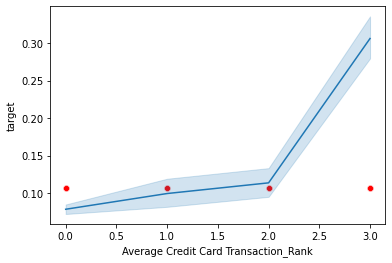

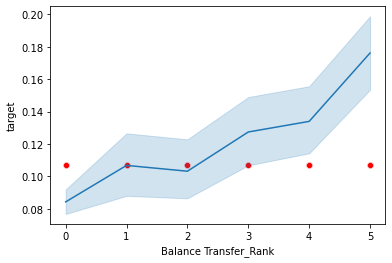

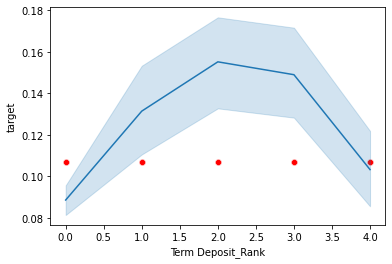

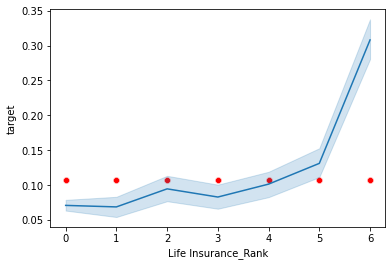

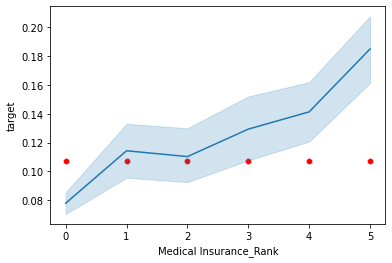

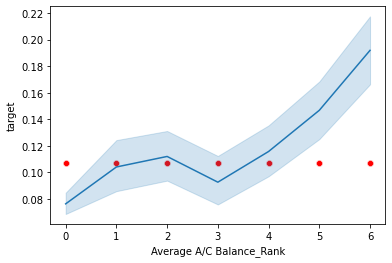

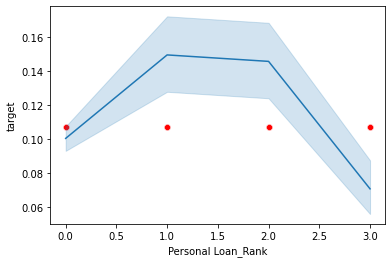

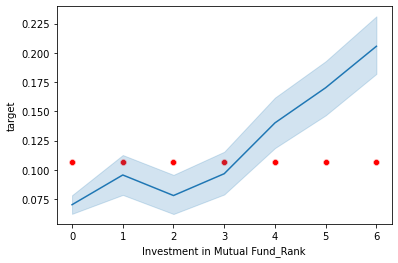

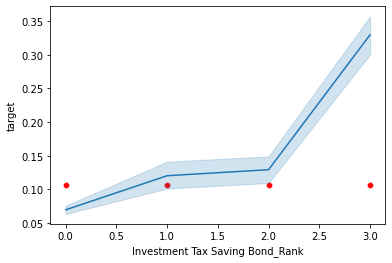

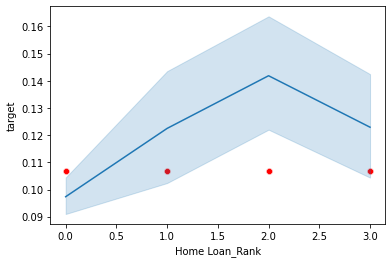

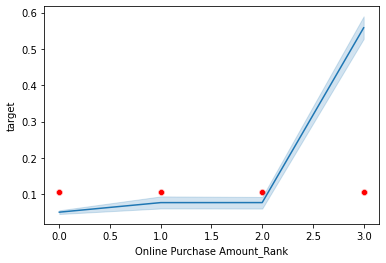

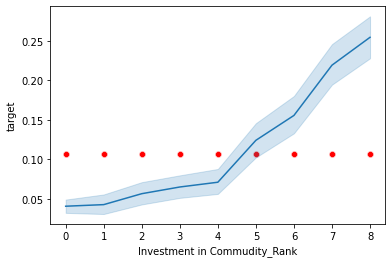

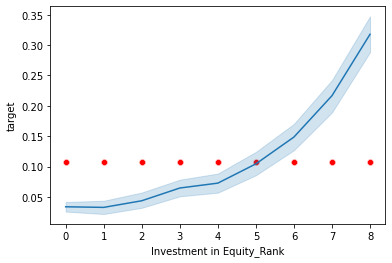

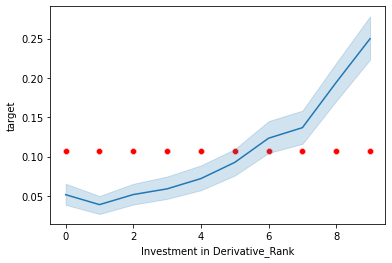

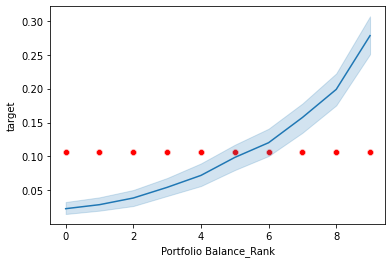

In [54]:
# plotting the above using scatterplot and lineplot
for cols in (num_binned.columns):
    plt.figure()
    sns.scatterplot(x = cols, y = X_bin_combined['target'].mean(), data = X_bin_combined, color = 'red')
    sns.lineplot(x = cols, y = 'target', data = X_bin_combined, estimator = mean)
plt.show()

In [55]:
# Dropping the feature year_last_moved

num = num.drop(['year_last_moved'], axis = 1)

In [56]:
num.dtypes

Average Credit Card Transaction    float64
Balance Transfer                   float64
Term Deposit                       float64
Life Insurance                     float64
Medical Insurance                  float64
Average A/C Balance                float64
Personal Loan                      float64
Investment in Mutual Fund          float64
Investment Tax Saving Bond         float64
Home Loan                          float64
Online Purchase Amount             float64
Investment in Commudity            float64
Investment in Equity               float64
Investment in Derivative           float64
Portfolio Balance                  float64
dtype: object

In [57]:
# All the features from the num will get selected due to good discrimination power by all of them
select_features_df_num = num

In [58]:
select_features_df_num.shape

(10155, 15)

## Feature Selection - Categorical Features

### Part 1 : Bi Variate Analysis

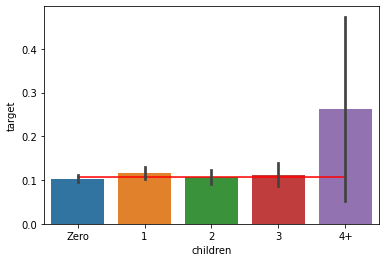

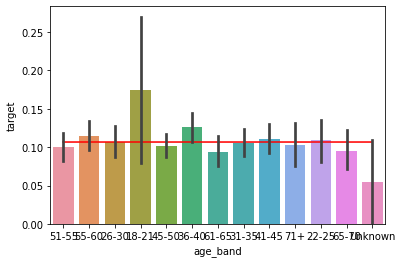

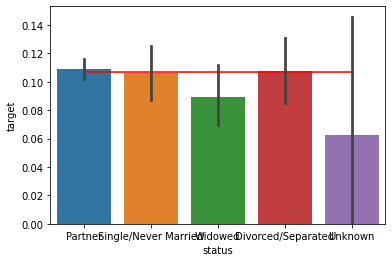

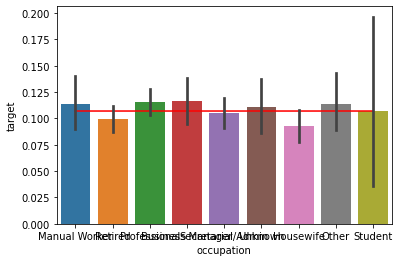

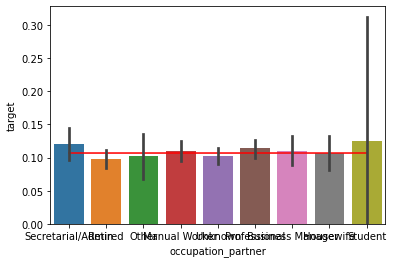

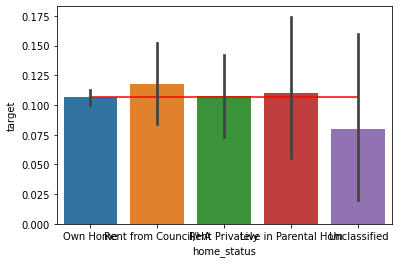

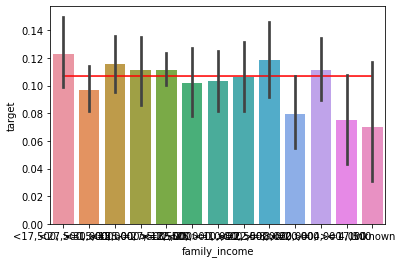

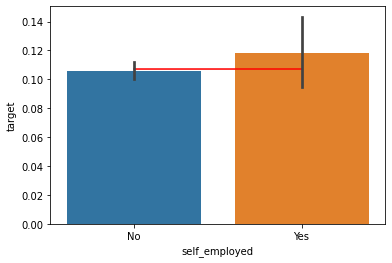

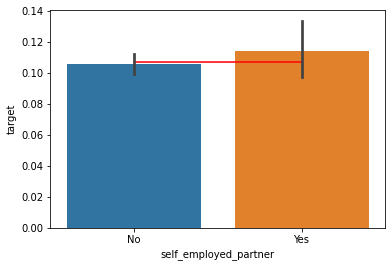

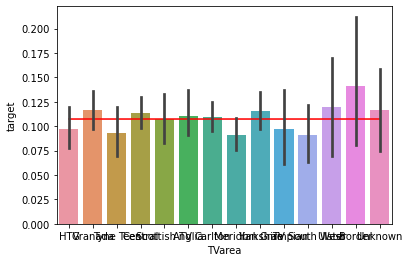

In [ ]:
X_char_merged = pd.concat([Y, char], axis = 1, join = 'inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x = col, y = X_char_merged['target'].mean(), data = X_char_merged, color = 'red')
    sns.barplot(x = col, y = 'target', data = X_char_merged, estimator = mean)
plt.show()    

In [ ]:
# Dropping the features that do no have any slope visible
char = char.drop(['TVarea', 'post_code', 'post_area','region'], axis = 1)

In [ ]:
char.dtypes

In [ ]:
# Create dummy features with n-1 levels
X_char_dum = pd.get_dummies(char, drop_first = True)
X_char_dum.shape

### Part 2 : Select KBest

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k = 52)
selector.fit_transform(X_char_dum, Y)

# Get the columns to keep and create new dataframe with those only
cols = selector.get_support(indices = True)
select_features_df_char = X_char_dum.iloc[:, cols]

In [ ]:
select_features_df_char.dtypes

## Creating the Master Feature Set for Model Development

In [ ]:
X_all = pd.concat([select_features_df_char, select_features_df_num], axis = 1, join = 'inner')

In [ ]:
X_all.shape

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, Y, test_size = 0.2, random_state =20)

In [ ]:
print('Shape of Training data : ',X_train.shape)
print('Shape pf Testing data : ',X_test.shape)
print('Revenue Rate in Training data : ',y_train.mean())
print('Revenue Rate in Testing data : ',y_test.mean())

## Model Building 

In [ ]:
# We start with fitting the logistic regression model, this would serve as a benchmark model 
# since Logistic model doesn't have alot of parameters we won't create a validation set for hyperparameter tuning

from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(class_weight = 'balanced',max_iter=200,random_state=20)  

In [ ]:
LR_model

In [ ]:
# Fitting the model
LR_model.fit(X_train, y_train)

In [ ]:
y_pred_prob = LR_model.predict_proba(X_all)[:, 1]
data['pred_prob_logreg'] = pd.DataFrame(y_pred_prob)

In [ ]:
y_pred_prob

In [ ]:
prediction_train = LR_model.predict_proba(X_train)

In [ ]:
pd.DataFrame(prediction_train)

In [ ]:
pd.Series(LR_model.predict(X_train)) ### applies a threshold of 0.5

In [ ]:
# Plotting the roc curve for the model fit 

from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix,f1_score ## model evaluation metrics
plot_roc_curve(LR_model,X =X_train, y= y_train)

In [ ]:
### Getting confusion matrix, F-score on the train data 

print(confusion_matrix(y_true = y_train, y_pred = LR_model.predict(X_train))) ### confusion matrix for pred on train set

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=y_train,y_pred = LR_model.predict(X_train),sample_weight = y_train))

In [ ]:
# Lets evaluate the performace on the test set 


plot_roc_curve(LR_model,X =X_test, y= y_test)

predicted_val = LR_model.predict(X_test)

print (confusion_matrix(y_true = y_test, y_pred = predicted_val))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=y_test,y_pred = predicted_val,sample_weight =y_test))

In [ ]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion = 'gini', random_state =20)

In [ ]:
# Using GridSearchCV to find the best parameters

np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [6,7,8,9], 'min_samples_split': [50, 100, 150, 200,250]}
tree_grid = GridSearchCV(dtree, cv = 10, param_grid = param_dist, n_jobs = -1)
tree_grid.fit(X_train, y_train)
print('Best parameters using grid search: \n', tree_grid.best_params_)

In [ ]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state =20, max_depth = 6, min_samples_split = 50)
dtree.fit(X_train, y_train)

In [ ]:
# Evaluating on the train and the test set 

predicted_train = dtree.predict(X_train)

plot_roc_curve(dtree,X =X_train, y= y_train)


print(confusion_matrix(y_true = y_train, y_pred = predicted_train))

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=y_train,y_pred = predicted_train,sample_weight = y_train))

In [ ]:
plot_roc_curve(dtree,X =X_test, y= y_test)

predicted_test = dtree.predict(X_test)

print (confusion_matrix(y_true = y_test, y_pred = predicted_test))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=y_test,y_pred = predicted_test,sample_weight = y_test))

In [ ]:
# Calculating the feature importances 

importances = dtree.feature_importances_

columns = list(X_train.columns)

importances_dict = {columns[i]: importances[i] for i in range(len(columns))}

importances_dict = dict(sorted(importances_dict.items(), key=lambda importances_dict: importances_dict[1],reverse=True))

In [ ]:
# Getting feature importances
import pandas as pd
feature_importances = pd.DataFrame(dtree.feature_importances_,
                                  index = X_train.columns,
                                  columns = ['importance']).sort_values('importance', ascending = False)
feature_importances

In [ ]:
from sklearn.tree import plot_tree
plot_rows =1
plot_cols = 1

fig, ax1 = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

plot_tree(dtree,ax=ax1,fontsize=10)
plt.show()

In [ ]:
# Building Random Forest Model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', random_state = 20, max_depth = 6, min_samples_split = 50)
rf.fit(X_train, y_train)

In [ ]:
# Evaluating on the train and the test set 

predicted_train = rf.predict(X_train)

plot_roc_curve(rf,X =X_train, y= y_train)

print ('The score for the DT model ', roc_auc_score(y_train,predicted_train))

print(confusion_matrix(y_true = y_train, y_pred = predicted_train))

print ('The F1-SCORE on the train set prediction ',f1_score(y_true=y_train,y_pred = predicted_train,sample_weight = y_train))

In [ ]:
plot_roc_curve(rf,X =X_test, y= y_test)

predicted_test = rf.predict(X_test)

print (confusion_matrix(y_true = y_test, y_pred = predicted_test))

print ('The F1-SCORE on the test set prediction ',f1_score(y_true=y_test,y_pred = predicted_test,sample_weight = y_test))

In [ ]:
# Getting feature importances
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = X_train.columns,
                                  columns = ['importance']).sort_values('importance', ascending = False)
feature_importances

## Conclusion

Logistic Regression Model seemed to give the best f1 score on both train and test data